# Problem statement 
compare and evaluate all models on breast cancer dataset from following 
- KNN 
- Logistic Regression 
- Decision Tree
- Bagging Classifier (Decision Tree)
- Random Forest
- Gaussian Naive Bayes 

In [72]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics  import accuracy_score,precision_score,recall_score,f1_score, confusion_matrix,classification_report,roc_auc_score

In [2]:
# load dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data,columns = data.feature_names)
df['target'] = data.target


# Part 1  - Data Understanding and Preprocessing

### Basic Analysis of data

In [3]:
# check data 
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
# check shape of data
df.shape

(569, 31)

In [5]:
# check datatypes of different features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
# check duplicate columns
df.duplicated().sum()

np.int64(0)

In [7]:
# check descriptive analysis about data
df.describe()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [8]:
# different classes distribution of target features
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

- 1 --> have cancer
- 0 --> no cancer

# Part 2 - Classification Models Implementations

### prepare data for model

In [9]:
X = df.iloc[:,:30]
y = df.iloc[:,-1]

In [10]:
x_train,x_test ,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state =42, stratify = y)

In [11]:
# scale data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### prepare models 

In [12]:
# model 1 --> KNN  k =3
knn1 = KNeighborsClassifier(n_neighbors = 3)
knn1.fit(x_train_scaled,y_train)
knn1_train_pred = knn1.predict(x_train_scaled)
knn1_test_pred = knn1.predict(x_test_scaled)
knn1_prob = knn1.predict_proba(x_test_scaled)[:,1]

In [13]:
# model 2 --> knn with k =7
knn2 = KNeighborsClassifier(n_neighbors = 7)
knn2.fit(x_train_scaled,y_train)
knn2_train_pred = knn2.predict(x_train_scaled)
knn2_test_pred = knn2.predict(x_test_scaled)
knn2_prob = knn2.predict_proba(x_test_scaled)[:,1]

In [14]:
# model 3 --> Logistic Regression with regularization 
logistic = LogisticRegression(
    penalty = 'l2',  # l2 regularization = lasso
    solver ='lbfgs', 
    C= 1.0               # inverse of lambda 
) 
logistic.fit(x_train_scaled,y_train)
logistic_train_pred = logistic.predict(x_train_scaled)
logistic_test_pred = logistic.predict(x_test_scaled)
logistic_prob = logistic.predict_proba(x_test_scaled)[:,1]

In [61]:
# model4 = decision tree classifier
dt = DecisionTreeClassifier(
    max_depth = 3,
    criterion = 'gini',
    random_state = 42
)
dt.fit(x_train,y_train)
dt_train_pred = dt.predict(x_train)
dt_test_pred = dt.predict(x_test)
dt_prob = dt.predict_proba(x_test)[:,1]

In [56]:
# model 5 Random Forest 
rf = RandomForestClassifier(
    n_estimators = 150,
    random_state =42
)
rf.fit(x_train,y_train)
rf_train_pred = rf.predict(x_train)
rf_test_pred = rf.predict(x_test)
rf_prob = rf.predict_proba(x_test)[:,1]

In [17]:
# model6 = GaussianNB
gauss_model = GaussianNB()
gauss_model.fit(x_train,y_train)
gauss_train_pred = gauss_model.predict(x_train)
gauss_test_pred = gauss_model.predict(x_test)
gauss_prob = gauss_model.predict_proba(x_test)[:,1]

In [18]:
# model 7 = Bagging classifier

bgc = BaggingClassifier(estimator = DecisionTreeClassifier(max_depth =3,criterion = 'gini',random_state = 42),random_state =42)
bgc.fit(x_train,y_train)
bgc_train_pred = bgc.predict(x_train)
bgc_test_pred = bgc.predict(x_test)
bgc_prob = bgc.predict_proba(x_test)[:,1]

# Part 3 - Model Comparison and Reasoning 

### Evaluation of all models

In [62]:
# Evaluation function 
result = {}
def evaluate_model(model,y_train,y_test,y_train_pred,y_pred,y_prob):
    model_name = model.__class__.__name__  ## to avoid the all estimators name and use only model name 
    print(f'\n{model_name} Evaluation\n')
    train_accuracy =accuracy_score(y_train,y_train_pred)
    test_accuracy =accuracy_score(y_test,y_pred)
    precision =precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1= f1_score(y_test,y_pred)
    roc_auc =roc_auc_score(y_test,y_prob)
   
    # store the all metrices score in dictionary to use in dataframe later
    result[model_name] = {
        'Train_Accuracy' :train_accuracy,
        'Test_Accuracy': test_accuracy,
        'Precision': precision,
        'Recall': recall,
        'f1_score': f1,
        'roc_auc_score': roc_auc
    }

    print(f'\nname {model_name}')
    print(f'Train Accuracy: {train_accuracy}')
    print(f'Test Accuracy: {test_accuracy}')
    print(f'Precision score: {precision}')
    print(f'Recall score: {recall}')
    print(f'f1_score : {f1}')
    print(f'Roc Auc Score: {roc_auc}')
    print('\nConfusion Matrix\n',confusion_matrix(y_test,y_pred))
    print('\n\nClassification Report\n',classification_report(y_test,y_pred))




    
    
    

In [63]:
# call function to evaluate models 
evaluate_model(knn1,y_train,y_test,knn1_train_pred,knn1_test_pred,knn1_prob)

evaluate_model(knn2,y_train,y_test,knn2_train_pred,knn2_test_pred,knn2_prob)

evaluate_model(logistic,y_train,y_test,logistic_train_pred,logistic_test_pred,logistic_prob)

evaluate_model(dt,y_train,y_test,dt_train_pred,dt_test_pred,dt_prob)

evaluate_model(rf,y_train,y_test,rf_train_pred,rf_test_pred,rf_prob)

evaluate_model(gauss_model,y_train,y_test,gauss_train_pred,gauss_test_pred,gauss_prob)

evaluate_model(bgc,y_train,y_test,bgc_train_pred,bgc_test_pred,bgc_prob)


KNeighborsClassifier Evaluation


name KNeighborsClassifier
Train Accuracy: 0.978021978021978
Test Accuracy: 0.9824561403508771
Precision score: 0.972972972972973
Recall score: 1.0
f1_score : 0.9863013698630136
Roc Auc Score: 0.9834656084656085

Confusion Matrix
 [[40  2]
 [ 0 72]]


Classification Report
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        42
           1       0.97      1.00      0.99        72

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


KNeighborsClassifier Evaluation


name KNeighborsClassifier
Train Accuracy: 0.9758241758241758
Test Accuracy: 0.9736842105263158
Precision score: 0.96
Recall score: 1.0
f1_score : 0.9795918367346939
Roc Auc Score: 0.9884259259259259

Confusion Matrix
 [[39  3]
 [ 0 72]]


Classification Report
               precision    recall  f1-score   support

           0

In [64]:
# DataFrame of all models
result_df = pd.DataFrame(result).T.sort_values(by = 'Test_Accuracy',ascending = False)
result_df

,Train_Accuracy,Test_Accuracy,Precision,Recall,f1_score,roc_auc_score
LogisticRegression,0.989011,0.982456,0.986111,0.986111,0.986111,0.995370
KNeighborsClassifier,0.975824,0.973684,0.960000,1.000000,0.979592,0.988426
RandomForestClassifier,1.000000,0.956140,0.958904,0.972222,0.965517,0.992725
BaggingClassifier,0.980220,0.947368,0.958333,0.958333,0.958333,0.968254
DecisionTreeClassifier,0.975824,0.938596,0.945205,0.958333,0.951724,0.944610
GaussianNB,0.940659,0.938596,0.945205,0.958333,0.951724,0.987765


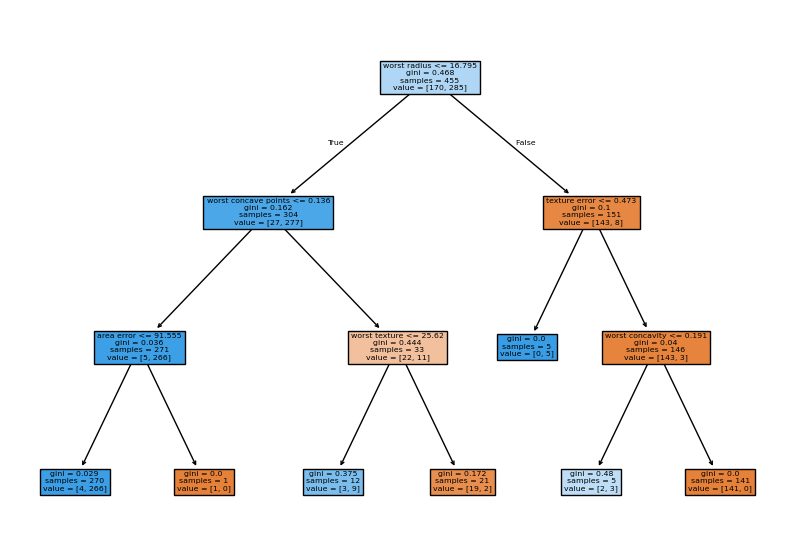

In [73]:
# check decision tree 
plt.figure(figsize =(10,7))
plot_tree(dt,filled= True,feature_names = data.feature_names)
plt.show()

### Reasoning 

Q1 why Random Forest Outperform  decision trees?

- Because single Decision Tree alone are generally gives high variance problem basically on simple or small datasets and prone to overfit because small change in data make compeletely different tree which makes decision trees unpredictable nature
- where random forest solves this problem by training multiple decision trees on unseen data and combining all weak learners to get best model which outperforms that's why random forest outperfroms decision tree

Q2 why Naive Bayes perform worse despite being fast?

- Naive Bayes is fast because in this algorithm there is no optimization, no distance calculation and no tree building just calculating probability 
and basic assumption of the Naive Bayes is that features are conditionally independent that Feature A has nothing to do with the feature B where as per the features of Breast Cancer dataset are highly related to each other, which makes the assumption of Naive Bayes false 
- where features of the dataset like radius , mean , etc are highly coorelated with each other including target 
- that's why Naive Bayes gives worse perfomance on this dataset based upon it's assumption about the data

Q3 Why recall is important in Medicine dataset

- Recall is more important than precision specially in medicine dataset because recall metric gives tells us that from actaul positive values how much our model predict true and deals with false negative count which tells from actuall patients who have cancer how much our model not predict positive.
- means the patients which actually have cancer are 42 in testing data, so negative cancer prediction for the patient which actually have cancer is not acceptable for even single or some patients because we can't accept that model to use on real health related problems 
- where precision deals with false positive score the patients who are wrongly positive predicted can be acceptable at some range but we can't left patient who actually have cancer and predicted as negative 
- that's why recall is important for medicine dataset

Q3 Why is KNN slower during prediction 

- Because KNN do all it's computation during prediction, in training phase it stores all the points as it is 
-  and when new point cames it compute it's distance from all points, pick top k neighbors and predict the new point class 
- that's why knn is slower during prediction.

# Part 4 - K means clustring

In [65]:
from sklearn.cluster import KMeans

In [69]:
X = pd.DataFrame(data.data,columns = data.feature_names)
X.head(5)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [70]:
# Scale the data
x_scaled = scaler.fit_transform(X)

In [74]:
# Calculate best value of k 
wcss =[]
for k in range(1,15):
    kmeans = KMeans(n_clusters =k ,random_state =42)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
wcss

D:\miniconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\miniconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\miniconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\miniconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

[17070.0,
 11595.683312822135,
 10066.28184253335,
 9266.154235789782,
 9263.404816345355,
 8562.878816973258,
 8016.368826653423,
 7288.475099597567,
 7040.992779468627,
 6668.853779565722,
 6464.922114379259,
 6309.399074022248,
 6110.619021559037,
 5979.796297083742]

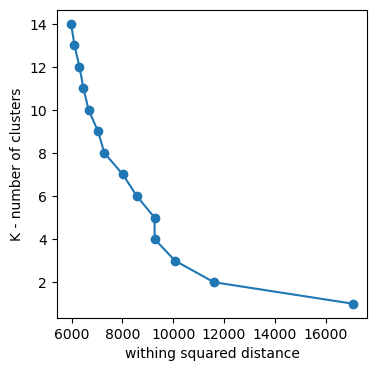

In [79]:
# plot The graph for elbow method 
plt.figure(figsize =(4,4))
plt.plot(wcss,range(1,15),marker= 'o')
plt.ylabel('K - number of clusters')
plt.xlabel('withing squared distance')
plt.show()

In [87]:
kmeans = KMeans(n_clusters =3,init ='k-means++',random_state =42)
clusters= kmeans.fit_predict(x_scaled)
X['cluster'] = clusters
X.head(10)

D:\miniconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,clusters,cluster
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1,1
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,1,1
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0,0


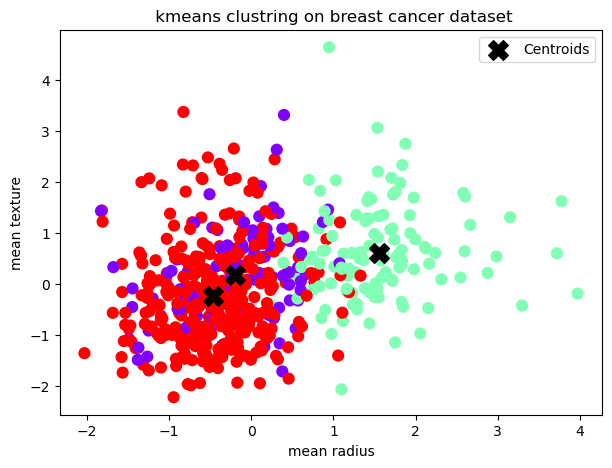

In [88]:
# plot the clusters
plt.figure(figsize =(7,5))

plt.scatter(x_scaled[:,0],x_scaled[:,1],c =clusters,cmap ='rainbow',s =60)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c ='black',marker ='X',s = 200,label ='Centroids')
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.title(' kmeans clustring on breast cancer dataset')
plt.legend()
plt.show()

Q1 - K means is supervised or unsupervised ?

- k means is unsupervised ml technique 
- because in unsupervised ml we have unlabeled data means target values are not there with the features, so rather than understanding relation or find logic k means seprate the data into clusters on basis of their similarity and chracteristics


Q2 -  why might clusters not match actual labels?
- K-Means clusters don’t match actual labels because it groups data by distance and calculations and shape without knowing labels
- so this might be reason that clusters not match actual labels
- Real labels often overlap and don’t form clean, round groups, so distance-based clusters don’t line up with them.

# Part 5 Scenerio Based Questions 

Scenerio 1 - highly imbalanced dataset 
1. which model i choose?
 - logistic regression is my first option because data might be imbalanced but choosing proper hyperparameters and scaling well it is robust without any headache of overfitting
 - second choise is might be random forest because it train muliple weak learners decision trees and no headache of scaling even but there is chances of performance issue related for highly noise data because internally it uses the decision trees which are unpredictable cause change on even minimal change in data

2. which metric do i trust most?
   - for medicine data is usually trust confusion metrics, recall score it tells how well the model captures the actually positive patients having cancer, despite accuracy is showing any value.
  
3. why is accuracy is misleading?
   - accuracy is misleading because it shows the balanced output of recall and precision score combinely which can't show the internal predictions and values of different type of errors , where as confusion matrix opens everything that which type of values or model predict at which accuracy.

Scenerio 2  deployment on a low memory device.
1. which algorithm do you prefer?
   - prefer logistic regression because it stores few numbers and weights unlike capturing whole dataset like KNN and compute during the  prediction , logistic regression is best for low memory devic and it does'nt build any tree.
   - another algorithm is naive bays because it does not build any trees, any computations , just find probability.

2. which algorithm would i avoid?

   - for low memory device i basically avoid KNN, Random Forest and Decision tree because knn stores all data as it is and random forest and decision trees build trees which take lot of compuataion and memory.





# Part 6 - Reflection
- By comparing different ML models on the same dataset i learned that which algorithms are perform better in different situation and scenerios like Naive Bayes is worst performer because its assumption about the data we have will become wrong and decision trees can be used carefully for different datasets basis of size 
- i also learn how to use different metrices to compare the model performance on basis of problem we are solving , like for medicine dataset we prefer recall score over precision score.
- and also see how accuracy  can mislead us just by a number 
- and how well different algorithms are perform well even on unbalanced data.